In [19]:
!pip install opencv-python

  Using cached opencv_python-4.5.5.64-cp36-abi3-win_amd64.whl (35.4 MB)


# Importing the libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
import tensorflow as tf

# Download MNIST dataset

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Printing the shape values of training and testing

In [3]:
print('X Training shape: ',x_train.shape)
print('Y Training shape: ',y_train.shape)
print('X Testing shape: ',x_test.shape)
print('Y Testing shape: ',y_test.shape)

X Training shape:  (60000, 28, 28)
Y Training shape:  (60000,)
X Testing shape:  (10000, 28, 28)
Y Testing shape:  (10000,)


# plot for number of datapoints in each class

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

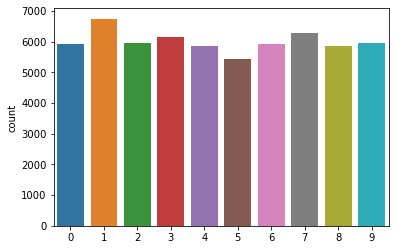

In [4]:
sns.countplot(y_train)

# printing an image from the dataset

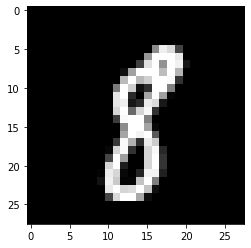

In [5]:
plt.imshow(x_train[300], cmap='gray')
plt.show()

# editing the input shape of the image

In [6]:
input_shape = (28,28,1)

In [7]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

# declaring batch size, number of classes and training epochs

In [8]:
# plt.imshow(x_train[2], cmap='gray')
# plt.show()
batch_size = 128
num_classes = 10
epochs = 5

In [9]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# CNN Model

In [10]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.5),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0

# compile the model

In [11]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# fitting the model

In [12]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 30s 71ms/step - loss: 0.4714 - accuracy: 0.8503 - val_loss: 0.1105 - val_accuracy: 0.9703
Epoch 2/5
422/422 [==============================] - 31s 72ms/step - loss: 0.1592 - accuracy: 0.9511 - val_loss: 0.0744 - val_accuracy: 0.9792
Epoch 3/5
422/422 [==============================] - 30s 72ms/step - loss: 0.1241 - accuracy: 0.9619 - val_loss: 0.0598 - val_accuracy: 0.9845
Epoch 4/5
422/422 [==============================] - 31s 74ms/step - loss: 0.1058 - accuracy: 0.9672 - val_loss: 0.0521 - val_accuracy: 0.9863
Epoch 5/5
422/422 [==============================] - 30s 72ms/step - loss: 0.0948 - accuracy: 0.9709 - val_loss: 0.0467 - val_accuracy: 0.9872


In [13]:
print(history.history)

{'loss': [0.47143876552581787, 0.1592247486114502, 0.12411235272884369, 0.10583975166082382, 0.09479255229234695], 'accuracy': [0.8503147959709167, 0.9511111378669739, 0.9619444608688354, 0.967203676700592, 0.9708518385887146], 'val_loss': [0.11045339703559875, 0.07442677021026611, 0.05979911983013153, 0.052064698189496994, 0.04669471085071564], 'val_accuracy': [0.9703333377838135, 0.9791666865348816, 0.984499990940094, 0.9863333106040955, 0.9871666431427002]}


# Loss PLot

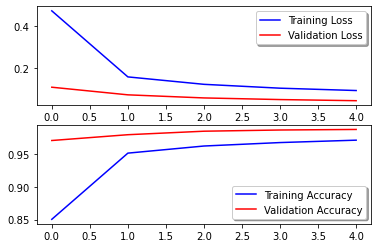

In [14]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# Evaluation

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.0446 - accuracy: 0.9857


# Plotting the heatmap

In [37]:
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

<AxesSubplot:>

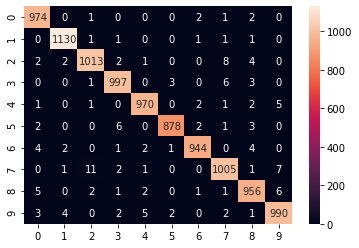

In [17]:
sns.heatmap(confusion_mtx, annot=True, fmt='g')

# Testing the model using an external image

In [20]:
import cv2 as cv


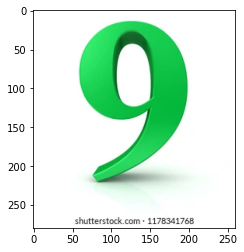

In [21]:
img = cv.imread('nine.png')
plt.imshow(img)
plt.show()

In [22]:
img.shape

(280, 260, 3)

In [24]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [25]:
gray.shape

(280, 260)

In [26]:
img_rs = cv.resize(gray, (28, 28))

In [27]:
img_rs.shape

(28, 28)

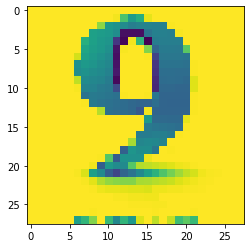

In [28]:
plt.imshow(img_rs)
plt.show()

In [29]:
img_rs = np.expand_dims(img_rs,0)

In [30]:
img_rs.shape

(1, 28, 28)

In [31]:
img_rs = np.expand_dims(img_rs,-1)

In [32]:
img_rs.shape

(1, 28, 28, 1)

# Prediction of the input

In [33]:
num = model.predict(img_rs)
num

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [34]:
rs = [0,1,2,3,4,5,6,7,8,9]

In [35]:
from numpy.core.fromnumeric import argmax
result = rs[argmax(num)]

In [36]:
result

0

# save the model

In [ ]:
model.save('mnist.h5')

In [ ]:
model = load_model('mnist.h5')

In [ ]:
model.summary()